# Preperations

## Imports

### Libraries

In [47]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Datasets

In [48]:
url20 = "https://zenodo.org/records/8303397/files/full_data_20.csv?download=1"
url40 = "https://zenodo.org/records/8303397/files/full_data_40.csv?download=1"
url60 = "https://zenodo.org/records/8303397/files/full_data_60.csv?download=1"
url80 = "https://zenodo.org/records/8303397/files/full_data_80.csv?download=1"
url100 = "https://zenodo.org/records/8303397/files/full_data_100.csv?download=1"

gamesAt20 = pd.read_csv(url20 , sep=',')
gamesAt40 = pd.read_csv(url40 , sep=',')
gamesAt60 = pd.read_csv(url60 , sep=',')
gamesAt80 = pd.read_csv(url80 , sep=',')
gamesAt100 = pd.read_csv(url100 , sep=',')

## Backups

In [49]:
backup20 = gamesAt20.copy()
backup40 = gamesAt40.copy()
backup60 = gamesAt60.copy()
backup80 = gamesAt80.copy()
backup100 = gamesAt100.copy()

## Reset point

In [50]:
gamesAt20 = backup20.copy()
gamesAt40 = backup40.copy()
gamesAt60 = backup60.copy()
gamesAt80 = backup80.copy()
gamesAt100 = backup100.copy()

## Cut junk

In [51]:
for games in [gamesAt20, gamesAt40, gamesAt60, gamesAt80, gamesAt100]:
    games.drop(labels=['matchID' , 'Unnamed: 0'], axis=1, inplace=True)

## Fix booleans to ints

In [52]:
for games in [gamesAt20, gamesAt40, gamesAt60, gamesAt80, gamesAt100]:
    games[['blueFirstBlood', 'redFirstBlood', 'blueWin', 'redWin']] = games[['blueFirstBlood', 'redFirstBlood', 'blueWin', 'redWin']].astype(int)

## Cut FF, remake, trolling

In [53]:
gamesAt20.drop(gamesAt20[gamesAt20['fullTimeMS'] < 1020000].index , inplace=True)
gamesAt40.drop(gamesAt40[gamesAt40['fullTimeMS'] < 1020000 ].index , inplace=True)
gamesAt60.drop(gamesAt60[gamesAt60['fullTimeMS'] < 1020000 ].index , inplace=True)
gamesAt80.drop(gamesAt80[gamesAt80['fullTimeMS'] < 1020000 ].index , inplace=True)
gamesAt100.drop(gamesAt100[gamesAt100['fullTimeMS'] < 1020000 ].index , inplace=True)

## Graph the data

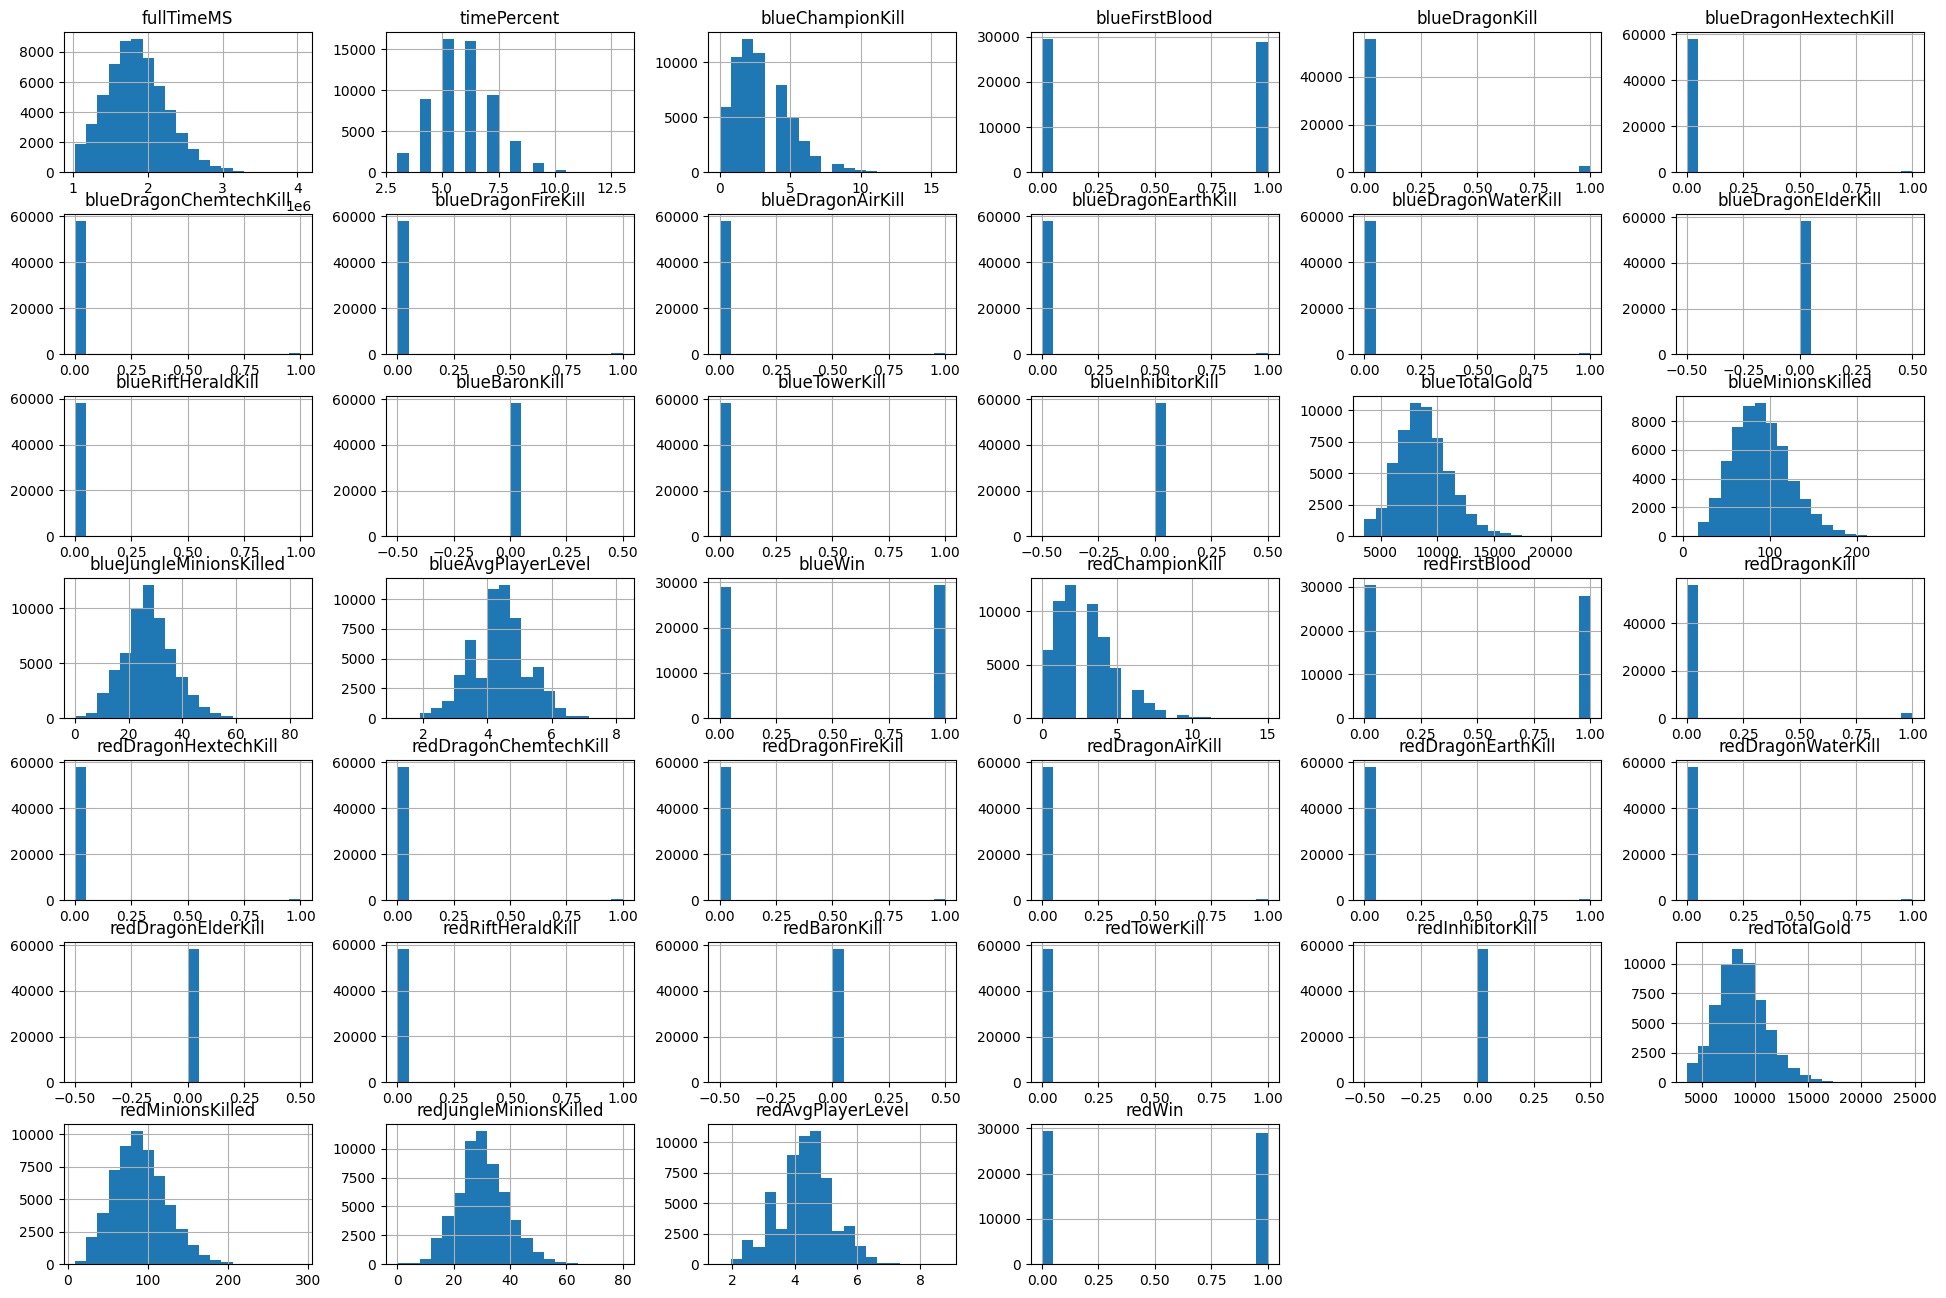

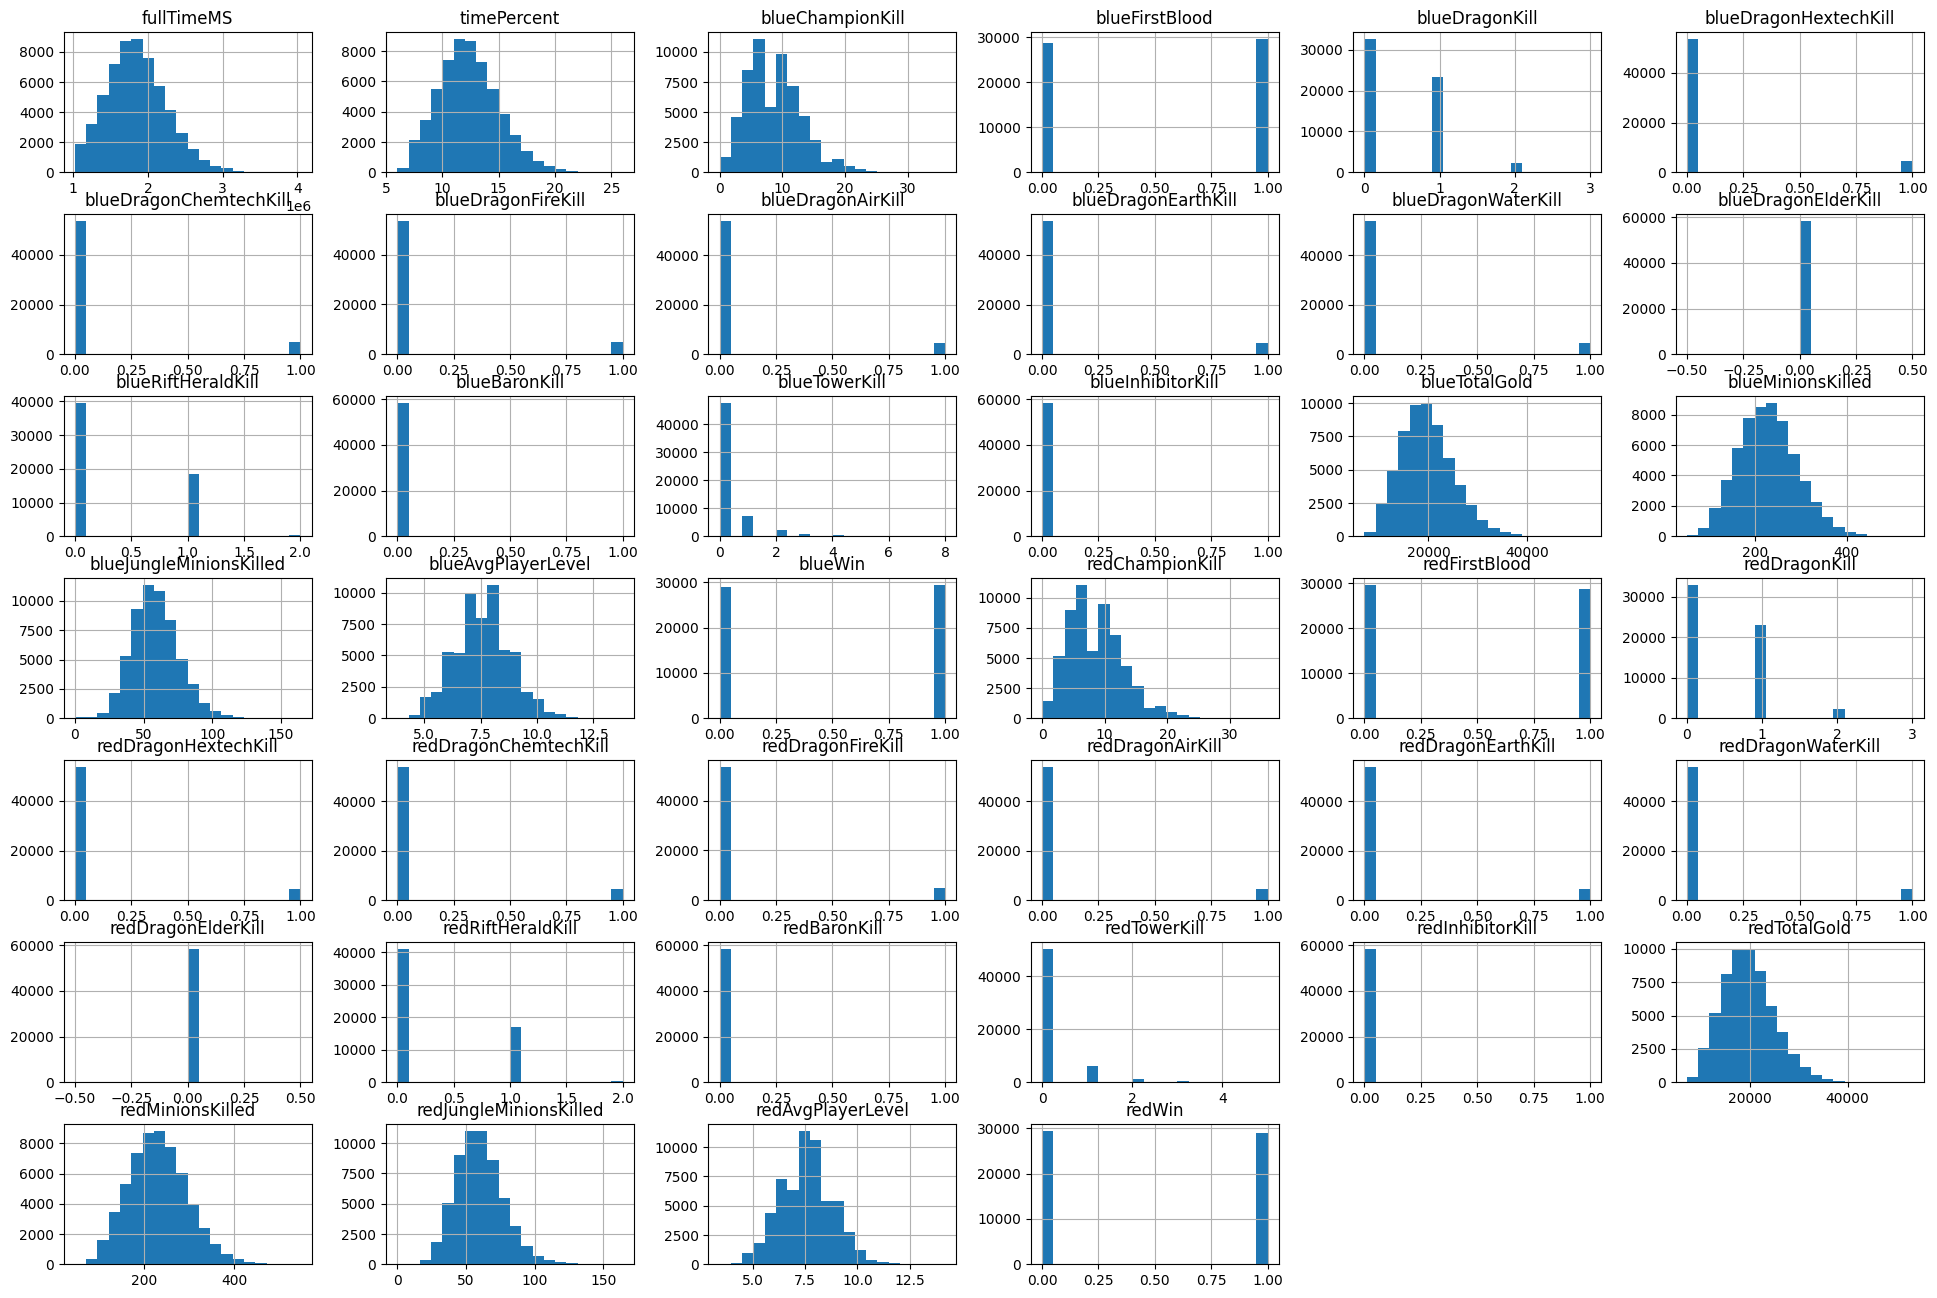

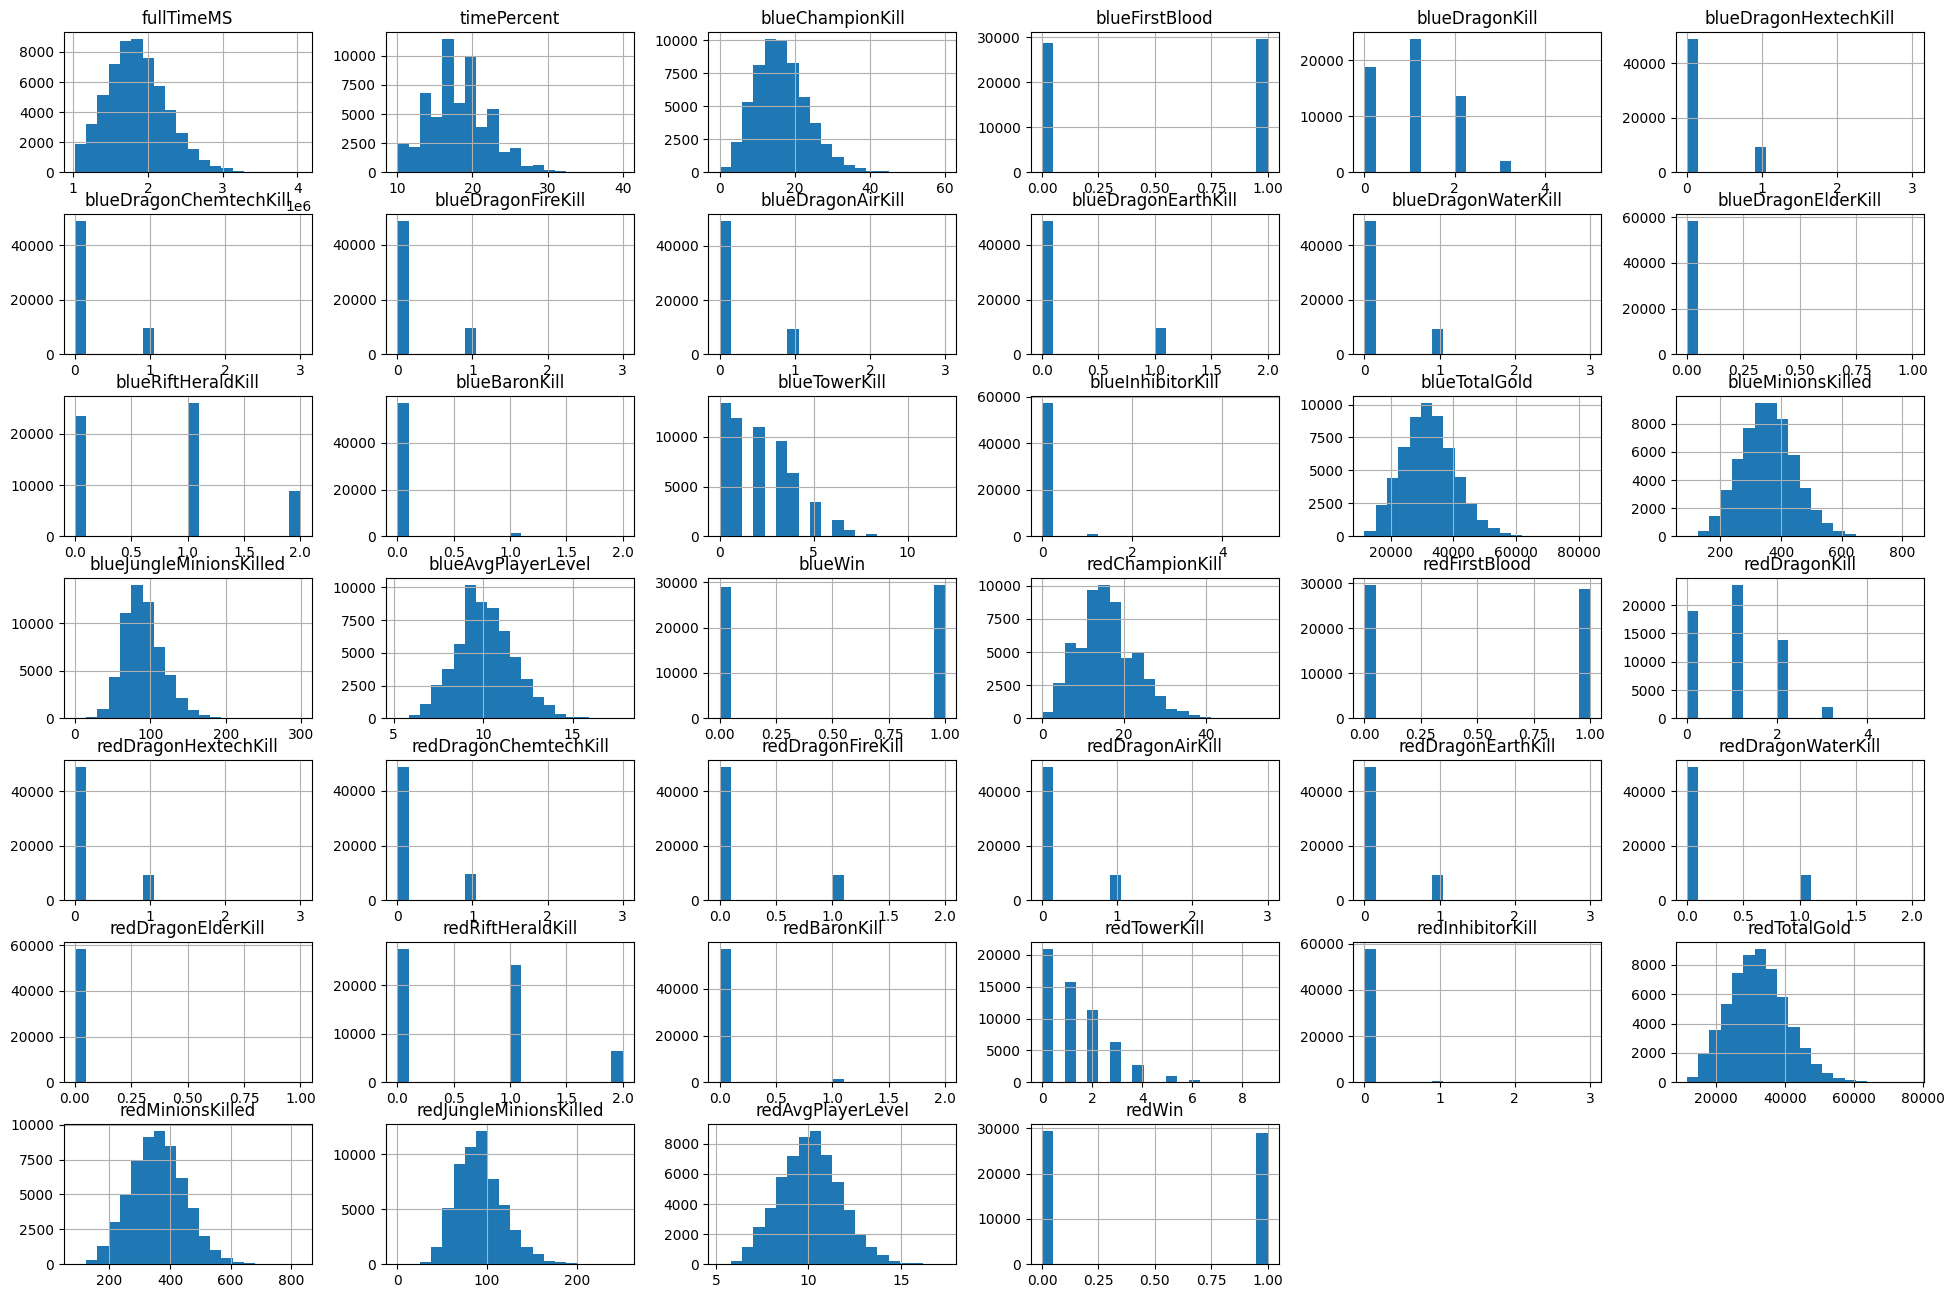

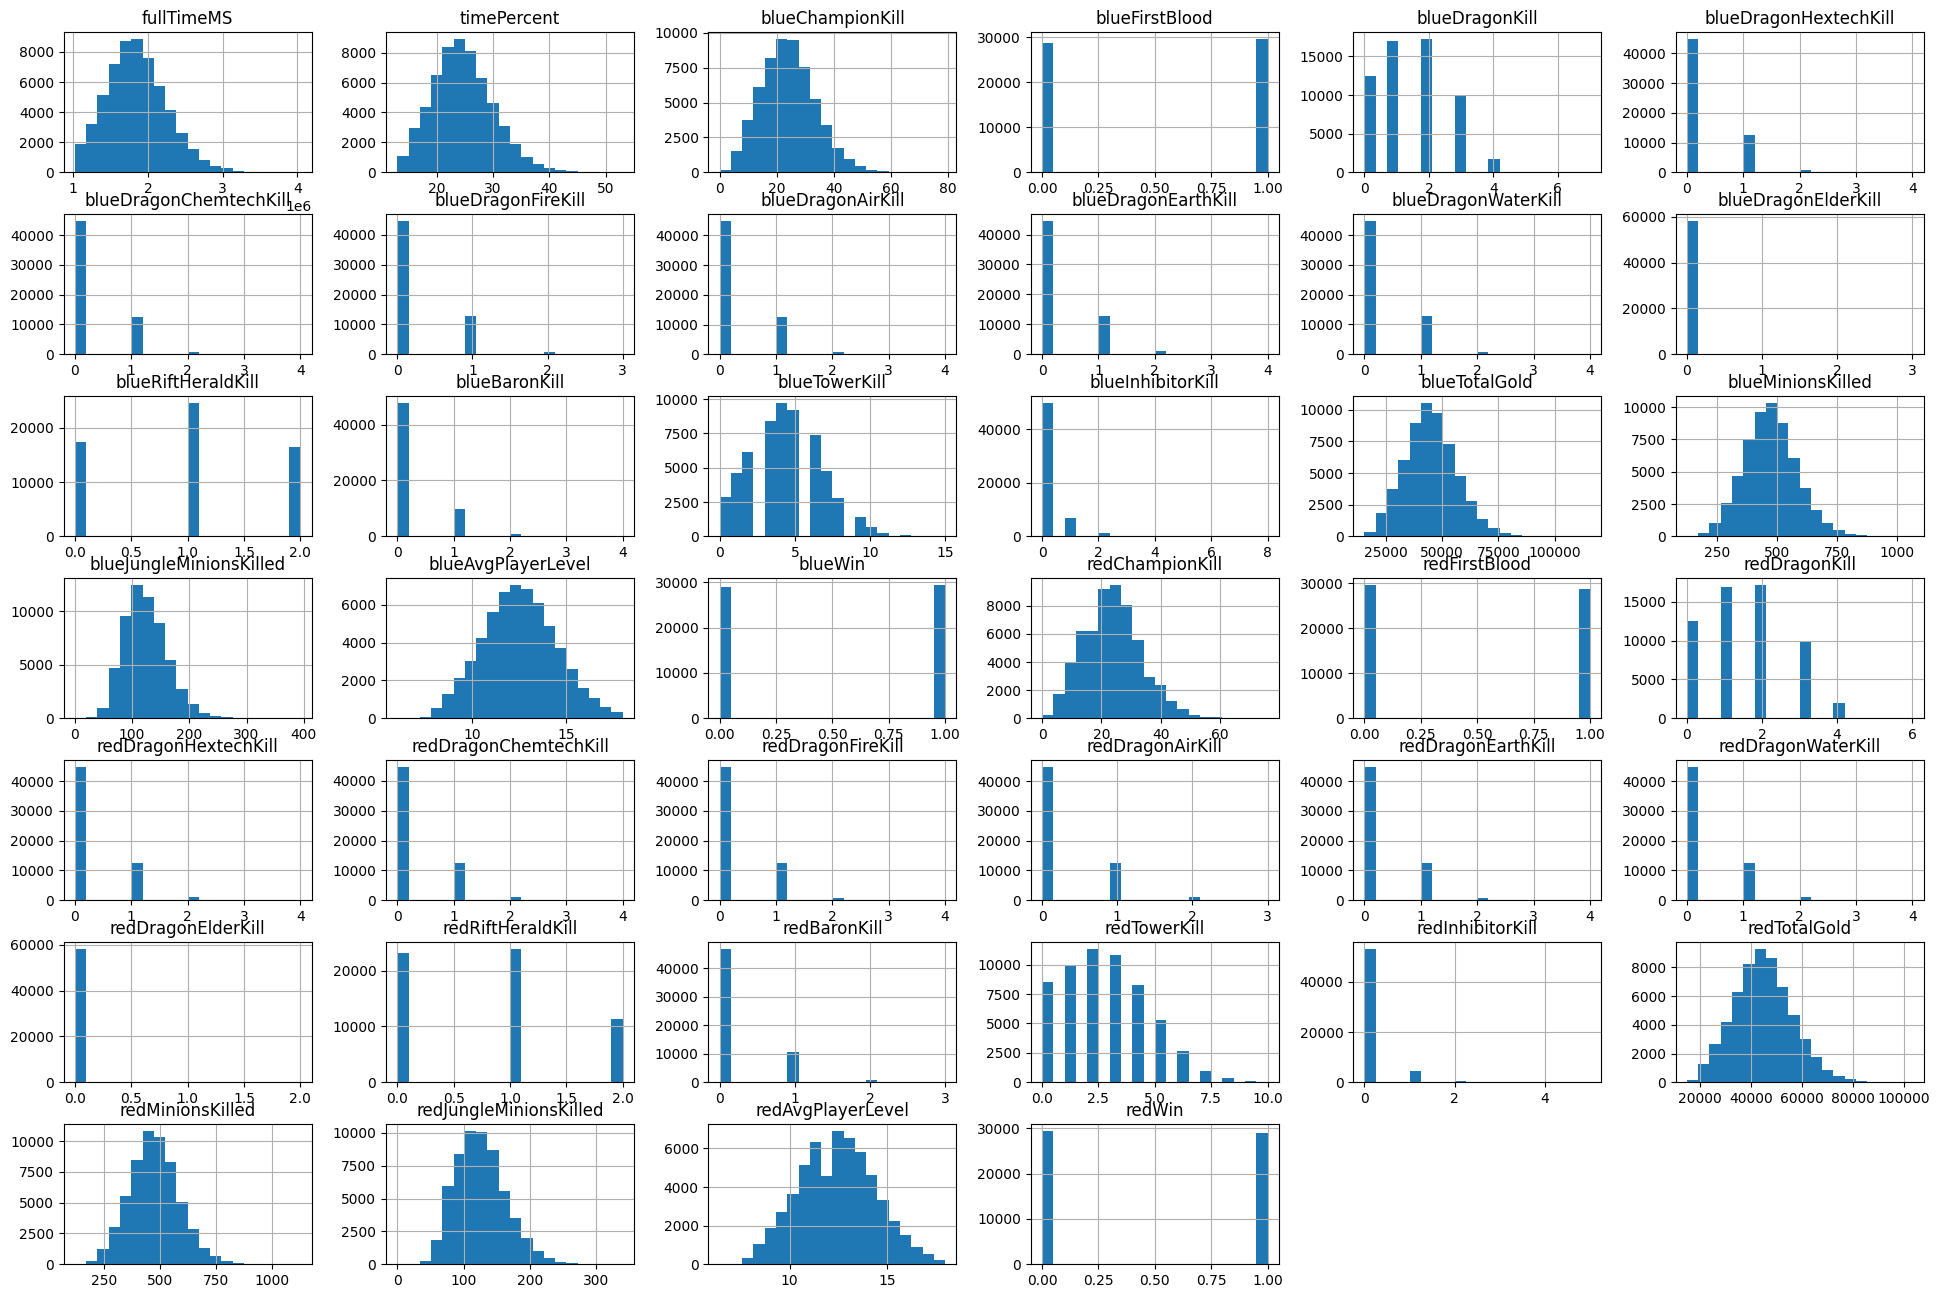

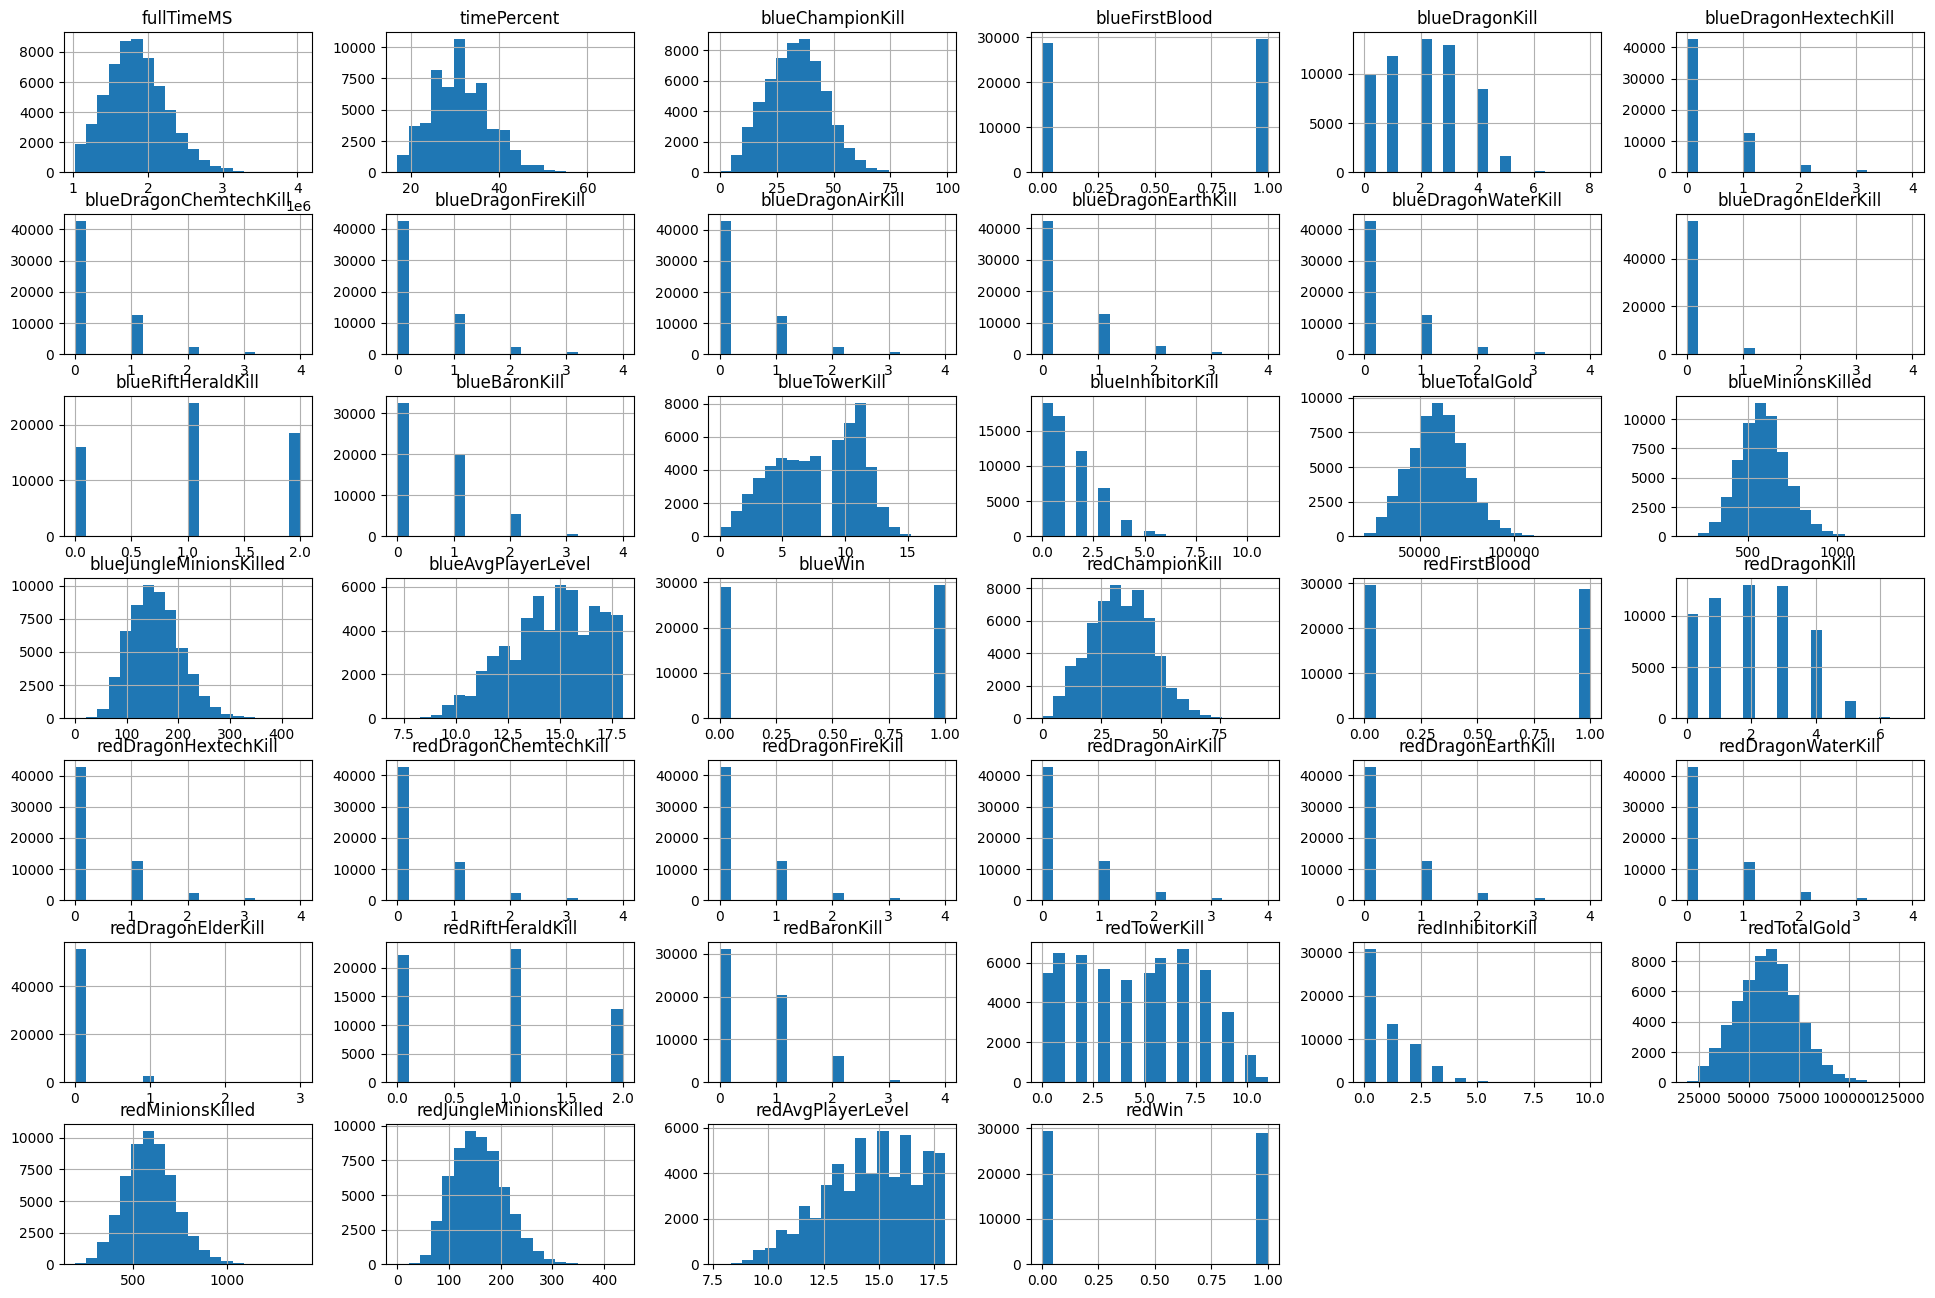

In [54]:
gamesAt20.hist(bins=20 , figsize=(24 , 16))
plt.show()

gamesAt40.hist(bins=20 , figsize=(24 , 16))
plt.show()

gamesAt60.hist(bins=20 , figsize=(24 , 16))
plt.show()

gamesAt80.hist(bins=20 , figsize=(24 , 16))
plt.show()

gamesAt100.hist(bins=20 , figsize=(24 , 16))
plt.show()

# Machine Learning

## Imports

In [55]:
from sklearn.model_selection import train_test_split

## split data

### Train and test on 20%

In [56]:
xb = gamesAt20.drop(['blueTotalGold' , 'redTotalGold'] , axis=1)
yb = gamesAt20['blueTotalGold']

xr = gamesAt20.drop(['blueTotalGold' , 'redTotalGold'] , axis=1)
yr = gamesAt20['redTotalGold']

xb_train, xb_test, yb_train, yb_test = train_test_split(xb, yb, test_size=0.2, random_state=42)
xr_train, xr_test, yr_train, yr_test = train_test_split(xr, yr, test_size=0.2, random_state=42)
print(xb_train.shape , yb_test.shape , xr_train.shape , yr_test.shape)

(46675, 38) (11669,) (46675, 38) (11669,)


### 40,60,80,100 as testing data

In [57]:
xb40 = gamesAt40.drop(['blueTotalGold' , 'redTotalGold'] , axis=1)
yb40 = gamesAt40['blueTotalGold']
xr40 = gamesAt40.drop(['blueTotalGold' , 'redTotalGold'] , axis=1)
yr40 = gamesAt40['redTotalGold']

xb60 = gamesAt60.drop(['blueTotalGold' , 'redTotalGold'] , axis=1)
yb60 = gamesAt60['blueTotalGold']
xr60 = gamesAt60.drop(['blueTotalGold' , 'redTotalGold'] , axis=1)
yr60 = gamesAt60['blueTotalGold']

xb80 = gamesAt80.drop(['blueTotalGold' , 'redTotalGold'] , axis=1)
yb80 = gamesAt80['blueTotalGold']
xr80 = gamesAt80.drop(['blueTotalGold' , 'redTotalGold'] , axis=1)
yr80 = gamesAt80['redTotalGold']

xb100 = gamesAt100.drop(['blueTotalGold' , 'redTotalGold'] , axis=1)
yb100 = gamesAt100['blueTotalGold']
xr100 = gamesAt100.drop(['blueTotalGold' , 'redTotalGold'] , axis=1)
yr100 = gamesAt100['redTotalGold']

## Regular Linear Regression

### Train model

#### Imports

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

#### Train

In [59]:
lin_regB = LinearRegression()
lin_regB.fit(xb_train , yb_train)

lin_regR = LinearRegression()
lin_regR.fit(xr_train , yr_train)

LinearRegression()

#### Test

In [60]:
lin_regB_pred = lin_regB.predict(xb_test)
lin_regR_pred = lin_regR.predict(xr_test)

lin_regB_pred_40 = lin_regB.predict(xb40)
lin_regR_pred_40 = lin_regR.predict(xr40)

lin_regR_pred_60 = lin_regR.predict(xr60)
lin_regB_pred_60 = lin_regB.predict(xb60)

lin_regR_pred_80 = lin_regR.predict(xr80)
lin_regB_pred_80 = lin_regB.predict(xb80)

lin_regR_pred_100 = lin_regR.predict(xr100)
lin_regB_pred_100 = lin_regB.predict(xb100)

### Plot Data

#### Imports

In [61]:
import matplotlib.pyplot as plt

#### Plots

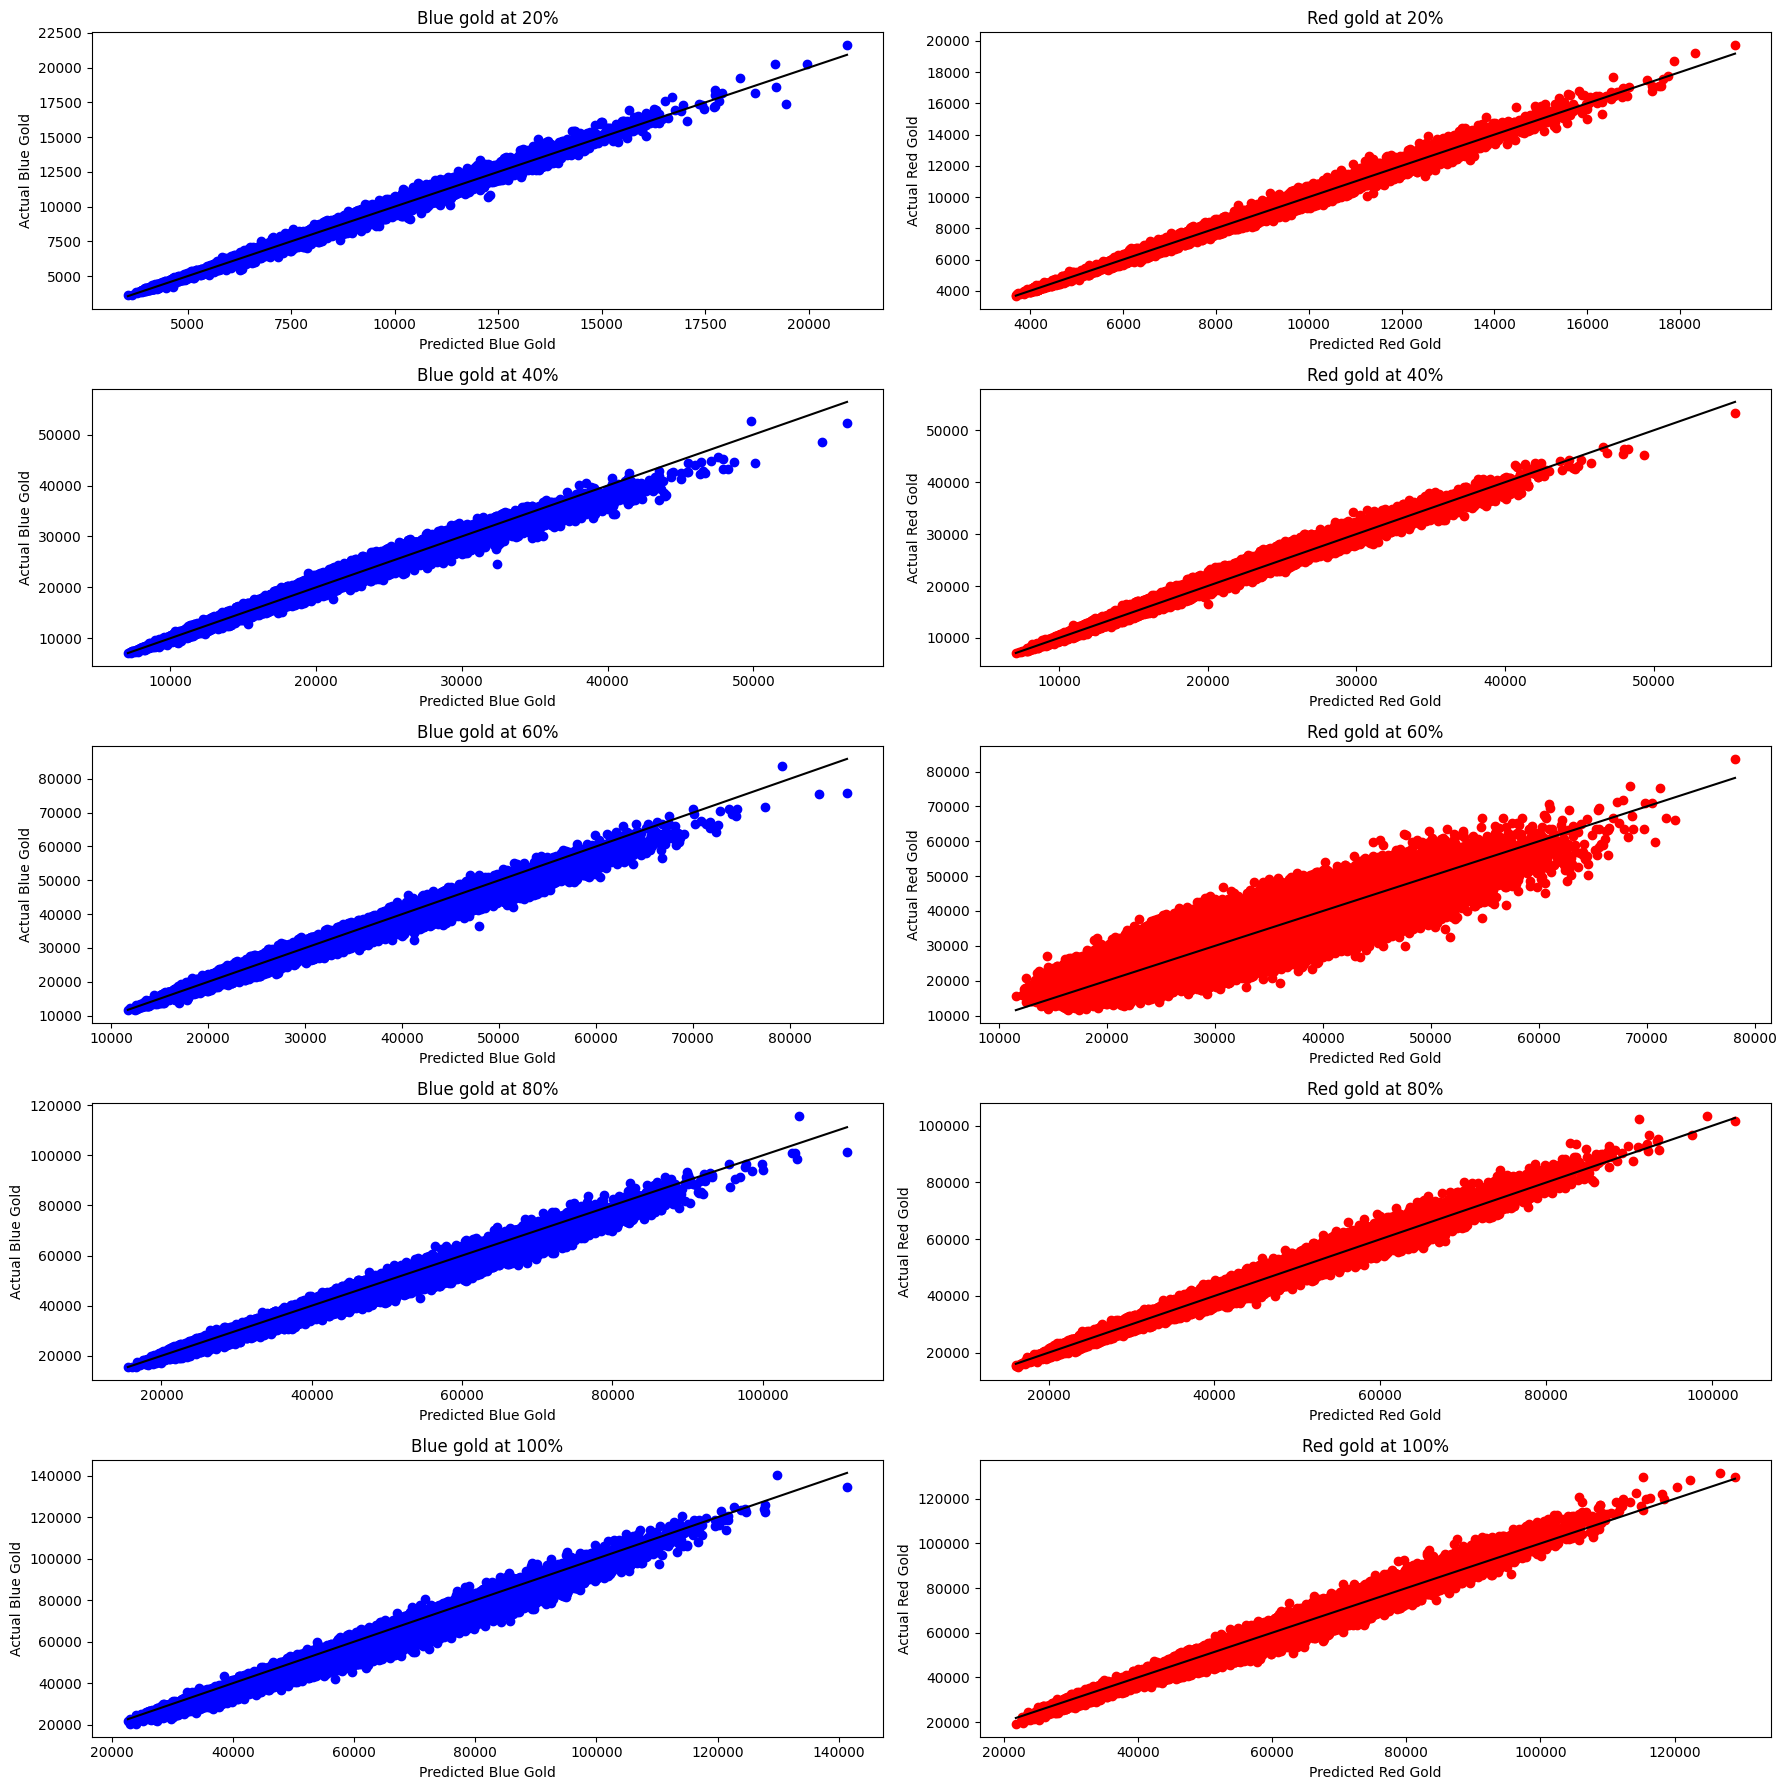

In [71]:
fig , axs = plt.subplots(5 , 2 , figsize=(18 , 18))

axs[0 , 0].scatter(lin_regB_pred , yb_test , color='blue')
axs[0 , 0].plot([lin_regB_pred.min() , lin_regB_pred.max()] , [lin_regB_pred.min() , lin_regB_pred.max()] , color='black' , lw=1.5)
axs[0 , 0].set_title('Blue gold at 20%')
axs[0 , 0].set_ylabel('Actual Blue Gold')
axs[0 , 0].set_xlabel('Predicted Blue Gold')

axs[0 , 1].scatter(lin_regR_pred , yr_test , color='red')
axs[0 , 1].plot([lin_regR_pred.min() , lin_regR_pred.max()] , [lin_regR_pred.min() , lin_regR_pred.max()] , color='black' , lw=1.5)
axs[0 , 1].set_title('Red gold at 20%')
axs[0 , 1].set_ylabel('Actual Red Gold')
axs[0 , 1].set_xlabel('Predicted Red Gold')

axs[1 , 0].scatter(lin_regB_pred_40 , yb40 , color='blue')
axs[1 , 0].plot([lin_regB_pred_40.min() , lin_regB_pred_40.max()] , [lin_regB_pred_40.min() , lin_regB_pred_40.max()] , color='black' , lw=1.5)
axs[1 , 0].set_title('Blue gold at 40%')
axs[1 , 0].set_ylabel('Actual Blue Gold')
axs[1 , 0].set_xlabel('Predicted Blue Gold')

axs[1 , 1].scatter(lin_regR_pred_40 , yr40 , color='red')
axs[1 , 1].plot([lin_regR_pred_40.min() , lin_regR_pred_40.max()] , [lin_regR_pred_40.min() , lin_regR_pred_40.max()] , color='black' , lw=1.5)
axs[1 , 1].set_title('Red gold at 40%')
axs[1 , 1].set_ylabel('Actual Red Gold')
axs[1 , 1].set_xlabel('Predicted Red Gold')

axs[2 , 0].scatter(lin_regB_pred_60 , yb60 , color='blue')
axs[2 , 0].plot([lin_regB_pred_60.min() , lin_regB_pred_60.max()] , [lin_regB_pred_60.min() , lin_regB_pred_60.max()] , color='black' , lw=1.5)
axs[2 , 0].set_title('Blue gold at 60%')
axs[2 , 0].set_ylabel('Actual Blue Gold')
axs[2 , 0].set_xlabel('Predicted Blue Gold')

axs[2 , 1].scatter(lin_regR_pred_60 , yr60 , color='red')
axs[2 , 1].plot([lin_regR_pred_60.min() , lin_regR_pred_60.max()] , [lin_regR_pred_60.min() , lin_regR_pred_60.max()] , color='black' , lw=1.5)
axs[2 , 1].set_title('Red gold at 60%')
axs[2 , 1].set_ylabel('Actual Red Gold')
axs[2 , 1].set_xlabel('Predicted Red Gold')

axs[3 , 0].scatter(lin_regB_pred_80 , yb80 , color='blue')
axs[3 , 0].plot([lin_regB_pred_80.min() , lin_regB_pred_80.max()] , [lin_regB_pred_80.min() , lin_regB_pred_80.max()] , color='black' , lw=1.5)
axs[3 , 0].set_title('Blue gold at 80%')
axs[3 , 0].set_ylabel('Actual Blue Gold')
axs[3 , 0].set_xlabel('Predicted Blue Gold')

axs[3 , 1].scatter(lin_regR_pred_80 , yr80 , color='red')
axs[3 , 1].plot([lin_regR_pred_80.min() , lin_regR_pred_80.max()] , [lin_regR_pred_80.min() , lin_regR_pred_80.max()] , color='black' , lw=1.5)
axs[3 , 1].set_title('Red gold at 80%')
axs[3 , 1].set_ylabel('Actual Red Gold')
axs[3 , 1].set_xlabel('Predicted Red Gold')

axs[4 , 0].scatter(lin_regB_pred_100 , yb100 , color='blue')
axs[4 , 0].plot([lin_regB_pred_100.min() , lin_regB_pred_100.max()] , [lin_regB_pred_100.min() , lin_regB_pred_100.max()] , color='black' , lw=1.5)
axs[4 , 0].set_title('Blue gold at 100%')
axs[4 , 0].set_ylabel('Actual Blue Gold')
axs[4 , 0].set_xlabel('Predicted Blue Gold')

axs[4 , 1].scatter(lin_regR_pred_100 , yr100 , color='red')
axs[4 , 1].plot([lin_regR_pred_100.min() , lin_regR_pred_100.max()] , [lin_regR_pred_100.min() , lin_regR_pred_100.max()] , color='black' , lw=1.5)
axs[4 , 1].set_title('Red gold at 100%')
axs[4 , 1].set_ylabel('Actual Red Gold')
axs[4 , 1].set_xlabel('Predicted Red Gold')

plt.tight_layout()
plt.show()

### Analysis

#### Imports

In [63]:
from sklearn.metrics import r2_score as r2

#### Analysis


In [64]:
r2_B_20 = r2(yb_test , lin_regB_pred)
r2_R_20 = r2(yr_test , lin_regR_pred)
mse_B_20 = mse(yb_test , lin_regB_pred)
mse_R_20 = mse(yr_test , lin_regR_pred)

r2_B_40 = r2(yb40 , lin_regB_pred_40)
r2_R_40 = r2(yr40 , lin_regR_pred_40)
mse_B_40 = mse(yb40 , lin_regB_pred_40)
mse_R_40 = mse(yr40 , lin_regR_pred_40)

r2_B_60 = r2(yb60 , lin_regB_pred_60)
r2_R_60 = r2(yr60 , lin_regR_pred_60)
mse_B_60 = mse(yb60 , lin_regB_pred_60)
mse_R_60 = mse(yr60 , lin_regR_pred_60)

r2_B_80 = r2(yb80 , lin_regB_pred_80)
r2_R_80 = r2(yr80 , lin_regR_pred_80)
mse_B_80 = mse(yb80 , lin_regB_pred_80)
mse_R_80 = mse(yr80 , lin_regR_pred_80)

r2_B_100 = r2(yb100 , lin_regB_pred_100)
r2_R_100 = r2(yr100 , lin_regR_pred_100)
mse_B_100 = mse(yb100 , lin_regB_pred_100)
mse_R_100 = mse(yr100 , lin_regR_pred_100)

print(f"R2 Score Blue 20%:   {str(r2_B_20).ljust(20)} R2 Score Red 20%:   {r2_R_20}")
print(f"MSE Blue 20%:        {str(mse_B_20).ljust(20)} MSE Red 20%:        {mse_R_20}")

print(f"R2 Score Blue 40%:   {str(r2_B_40).ljust(20)} R2 Score Red 40%:   {r2_R_40}")
print(f"MSE Blue 40%:        {str(mse_B_40).ljust(20)} MSE Red 40%:        {mse_R_40}")

print(f"R2 Score Blue 60%:   {str(r2_B_60).ljust(20)} R2 Score Red 60%:   {r2_R_60}")
print(f"MSE Blue 60%:        {str(mse_B_60).ljust(20)} MSE Red 60%:        {mse_R_60}")

print(f"R2 Score Blue 80%:   {str(r2_B_80).ljust(20)} R2 Score Red 80%:   {r2_R_80}")
print(f"MSE Blue 80%:        {str(mse_B_80).ljust(20)} MSE Red 80%:        {mse_R_80}")

print(f"R2 Score Blue 100%:  {str(r2_B_100).ljust(20)} R2 Score Red 100%:  {r2_R_100}")
print(f"MSE Blue 100%:       {str(mse_B_100).ljust(20)} MSE Red 100%:       {mse_R_100}")

R2 Score Blue 20%:   0.9879113455516839   R2 Score Red 20%:   0.9892933844187844
MSE Blue 20%:        61482.195025494904   MSE Red 20%:        54116.3731533422
R2 Score Blue 40%:   0.9802124791702971   R2 Score Red 40%:   0.9825259425584015
MSE Blue 40%:        560404.5974562268    MSE Red 40%:        499810.68099611363
R2 Score Blue 60%:   0.9605837228581727   R2 Score Red 60%:   0.7194687417993149
MSE Blue 60%:        2756623.1742779724   MSE Red 60%:        19619279.737729095
R2 Score Blue 80%:   0.9476368345853611   R2 Score Red 80%:   0.979422343813559
MSE Blue 80%:        6719500.414275824    MSE Red 80%:        2691206.970147116
R2 Score Blue 100%:  0.8954031674492352   R2 Score Red 100%:  0.9730806690715808
MSE Blue 100%:       22630543.572160892   MSE Red 100%:       5981673.788020471
